In [1]:
from selfclean import SelfClean
from selfclean.cleaner.selfclean import PretrainingType, DINO_STANDARD_HYPERPARAMETERS
from pathlib import Path
import copy

In [2]:
parameters = copy.deepcopy(DINO_STANDARD_HYPERPARAMETERS)
parameters["dataset"]["augmentations"].update({
    "global_crops_scale": "(0.6, 1.)", # 0.4
    "local_crops_scale": "(0.02, 0.5)",  #0.3
    "local_crops_number": 14,
    #"random_flip": True,  # Horizontal flip
    #"perspective_transform": True,  
    #"rotation_degrees": 15, 
    #"shear": 0.2,  
})

2024-10-22 11:41:14.171 | INFO     | Running on: cuda
2024-10-22 11:41:14.173 | INFO     | Data loaded: there are 190 train images and 3 batches with a batch size of 64.
/opt/conda/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
2024-10-22 11:43:41.817 | INFO     | Student and Teacher are built: they are both pretrained_imagenet_dino network.
2024-10-22 11:43:41.821 | INFO     | Pre-trained weights not found. Training from scratch.


Self-supervised pre-training:   0%|          | 0/40 [00:00<?, ?it/s]

2024-10-22 11:51:18.916 | INFO     | Saving checkpoint: /home/jovyan/SELFCLEAN/Presentation_SelfClean/Notebooks/DINO-Dataset/checkpoints/checkpoint-epoch10.pth ...
2024-10-22 11:51:19.117 | INFO     | Saving current best: model_best.pth ...
2024-10-22 11:58:56.658 | INFO     | Saving checkpoint: /home/jovyan/SELFCLEAN/Presentation_SelfClean/Notebooks/DINO-Dataset/checkpoints/checkpoint-epoch20.pth ...
2024-10-22 11:58:56.906 | INFO     | Saving current best: model_best.pth ...
2024-10-22 12:06:37.904 | INFO     | Saving checkpoint: /home/jovyan/SELFCLEAN/Presentation_SelfClean/Notebooks/DINO-Dataset/checkpoints/checkpoint-epoch30.pth ...
2024-10-22 12:06:38.164 | INFO     | Saving current best: model_best.pth ...
2024-10-22 12:14:15.543 | INFO     | Saving checkpoint: /home/jovyan/SELFCLEAN/Presentation_SelfClean/Notebooks/DINO-Dataset/checkpoints/checkpoint-epoch40.pth ...
2024-10-22 12:14:15.792 | INFO     | Saving current best: model_best.pth ...


Creating dataset representation:   0%|          | 0/3 [00:00<?, ?it/s]

2024-10-22 12:18:30.303 | INFO     | Fitting cleaner on representation space: (190, 192)


Creating distance matrix:   0%|          | 0/2 [00:00<?, ?it/s]

Processing possible near duplicates:   0%|          | 0/2 [00:00<?, ?it/s]

Processing possible irrelevant samples: 0it [00:00, ?it/s]

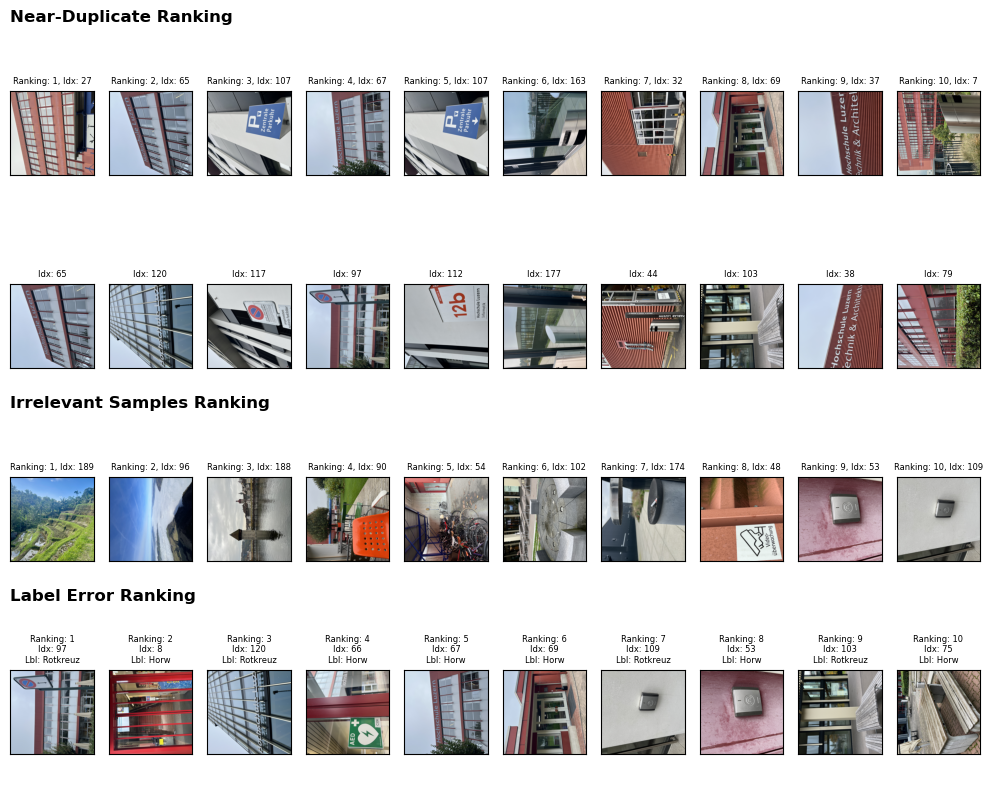

In [3]:
selfclean = SelfClean(
    # displays the top-7 images from each error type
    # per default this option is disabled
    plot_top_N=10, 
)

# run on image folder
issues = selfclean.run_on_image_folder(
    input_path="../Dataset",
    pretraining_type=PretrainingType.DINO, #IMAGENET_VIT / IMAGENET / DINO
    epochs=40,
    hyperparameters=parameters
)



In [4]:
# get the data quality issue rankings
df_near_duplicates = issues.get_issues("near_duplicates", return_as_df=True)

2024-10-22 12:30:22.544 | WARNING  | Returning as dataframe requires extensive memory.


In [5]:
df_irrelevants = issues.get_issues("irrelevants", return_as_df=True)

2024-10-22 12:30:24.738 | WARNING  | Returning as dataframe requires extensive memory.


In [6]:
df_label_errors = issues.get_issues("label_errors", return_as_df=True)

2024-10-22 12:30:25.473 | WARNING  | Returning as dataframe requires extensive memory.


In [8]:
path = Path("../../../SELFCLEAN/Presentation_SelfClean/Notebooks/V3Analysis")

df_near_duplicates.to_csv(path / "Dino_NearDuplicates.csv")
df_irrelevants.to_csv(path / "Dino_Irrelevant.csv")
df_label_errors.to_csv(path / "Dino_LabelErrors.csv")

In [7]:
df_near_duplicates

,indices_1,indices_2,scores,path_indices_1,path_indices_2,label_indices_1,label_indices_2
0,27,65,0.070456,../Dataset/Horw/Horw_2375.JPG,../Dataset/Horw/Horw_2419.JPG,Horw,Horw
1,65,120,0.079622,../Dataset/Horw/Horw_2419.JPG,../Dataset/Rotkreuz/Rotkreuz_2476.JPG,Horw,Rotkreuz
2,67,97,0.081963,../Dataset/Horw/Horw_2422.JPG,../Dataset/Rotkreuz/Horw_2427.JPG,Horw,Rotkreuz
3,107,117,0.082799,../Dataset/Rotkreuz/Rotkreuz_2462.JPG,../Dataset/Rotkreuz/Rotkreuz_2473.JPG,Rotkreuz,Rotkreuz
4,32,44,0.088481,../Dataset/Horw/Horw_2380.JPG,../Dataset/Horw/Horw_2392.JPG,Horw,Horw
...,...,...,...,...,...,...,...
17950,91,120,0.544361,../Dataset/Horw/Horw_2447.JPG,../Dataset/Rotkreuz/Rotkreuz_2476.JPG,Horw,Rotkreuz
17951,91,158,0.545688,../Dataset/Horw/Horw_2447.JPG,../Dataset/Rotkreuz/Rotkreuz_2518.JPG,Horw,Rotkreuz
17952,46,91,0.546697,../Dataset/Horw/Horw_2394.JPG,../Dataset/Horw/Horw_2447.JPG,Horw,Horw
17953,91,106,0.552745,../Dataset/Horw/Horw_2447.JPG,../Dataset/Rotkreuz/Rotkreuz_2461.JPG,Horw,Rotkreuz


In [8]:
df_irrelevants

,indices,scores,path,label
0,96,0.738151,../Dataset/Horw/Horw_7789.jpg,Horw
1,189,0.742531,../Dataset/Rotkreuz/Rotkreuz_9975.jpg,Rotkreuz
2,188,0.752888,../Dataset/Rotkreuz/Rotkreuz_2552.JPG,Rotkreuz
3,54,0.765258,../Dataset/Horw/Horw_2403.JPG,Horw
4,102,0.767626,../Dataset/Rotkreuz/Rotkreuz_2457.JPG,Rotkreuz
...,...,...,...,...
185,162,0.903385,../Dataset/Rotkreuz/Rotkreuz_2522.JPG,Rotkreuz
186,118,0.903397,../Dataset/Rotkreuz/Rotkreuz_2474.JPG,Rotkreuz
187,130,0.903397,../Dataset/Rotkreuz/Rotkreuz_2488.JPG,Rotkreuz
188,153,0.903399,../Dataset/Rotkreuz/Rotkreuz_2513.JPG,Rotkreuz


In [18]:
df_label_errors

,indices,scores,path,label
0,97,0.190000,../Dataset/Rotkreuz/Horw_2427.JPG,Rotkreuz
1,8,0.247614,../Dataset/Horw/Horw_2356.JPG,Horw
2,67,0.260921,../Dataset/Horw/Horw_2422.JPG,Horw
3,120,0.264868,../Dataset/Rotkreuz/Rotkreuz_2476.JPG,Rotkreuz
4,69,0.273133,../Dataset/Horw/Horw_2424.JPG,Horw
...,...,...,...,...
185,107,0.799055,../Dataset/Rotkreuz/Rotkreuz_2462.JPG,Rotkreuz
186,163,0.817383,../Dataset/Rotkreuz/Rotkreuz_2523.JPG,Rotkreuz
187,112,0.819467,../Dataset/Rotkreuz/Rotkreuz_2468.JPG,Rotkreuz
188,37,0.837440,../Dataset/Horw/Horw_2385.JPG,Horw
